# 0. Import Data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [8]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [10]:
y_train.head()

5889    1
5757    0
2000    1
3436    0
3770    0
Name: Churn, dtype: int64

# 1. Import Dependencies

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

Model1

In [12]:
model1 = Sequential()
model1.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

C:\Users\srava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


# 3. Fit, Predict and Evaluate

In [14]:
model1.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7362 - loss: 0.5740  
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7703 - loss: 0.4871
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.7775 - loss: 0.4763
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.7805 - loss: 0.4819
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7857 - loss: 0.4787
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.7773 - loss: 0.4719
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7780 - loss: 0.4713
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.7790 - loss: 0.4679
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7784 - loss: 0.4741
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7974 - loss: 0.4560
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7802 - loss: 0.4727
Epoch 12/20
177/177 ━━━━━━━━━━

In [15]:
y_hat = model1.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
accuracy_score(y_test, y_hat)

0.7686302342086586

# Model2

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Model 2
model2 = Sequential()
model2.add(Dense(units=64, activation='relu', input_dim=len(X_train.columns)))  # Changed input layer units and activation
model2.add(Dense(units=128, activation='relu'))  # Changed hidden layer units and activation
model2.add(Dense(units=1, activation='sigmoid'))  # Output layer remains the same

# Compile Model 2
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train Model 2
model2.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions with Model 2
y_hat_model2 = model2.predict(X_test)
y_hat_model2 = [0 if val < 0.5 else 1 for val in y_hat_model2]  # Convert probabilities to binary predictions


C:\Users\srava\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7386 - loss: 0.5743
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7622 - loss: 0.5008
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7711 - loss: 0.4864
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7963 - loss: 0.4599
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7876 - loss: 0.4692
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.4683
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7866 - loss: 0.4683
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.4605
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7861 - loss: 0.4625
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 0.4693
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7861 - loss: 0.4555
Epoch 12/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [18]:
accuracy_score(y_test, y_hat_model2)

0.7636621717530163

#Comparing Model 1 and Model 2

In [19]:
print("Model1 Accuracy Score:", accuracy_score(y_test, y_hat))
print("Model2 Accuracy Score:", accuracy_score(y_test, y_hat_model2))

Model1 Accuracy Score: 0.7686302342086586
Model2 Accuracy Score: 0.7636621717530163


In Model 1 we used 2 hidden layers with 32 and 64 units respectively.
In Model 2 we used 2 hidden layers with 64 and 128 units
We dont see much difference in the accuracy of the models.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


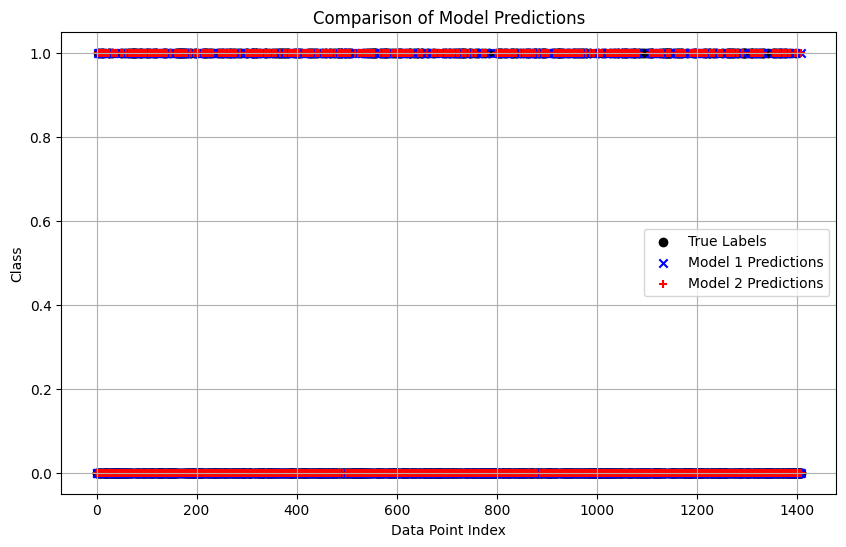

Model1 Accuracy Score: 0.7686302342086586
Model2 Accuracy Score: 0.7636621717530163


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming y_hat is defined and calculated for Model 1
y_hat = model1.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# Calculate accuracy scores
accuracy_model1 = accuracy_score(y_test, y_hat)
accuracy_model2 = accuracy_score(y_test, y_hat_model2)

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, marker='o', color='black', label='True Labels')
plt.scatter(range(len(y_test)), y_hat, marker='x', color='blue', label='Model 1 Predictions')
plt.scatter(range(len(y_test)), y_hat_model2, marker='+', color='red', label='Model 2 Predictions')

plt.title('Comparison of Model Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()

print("Model1 Accuracy Score:", accuracy_model1)
print("Model2 Accuracy Score:", accuracy_model2)
